In [1]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scikit_posthocs as sp

from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene,  kruskal


## 4.6 Correlation analysis

The following chapter will further explore the seasonal patterns looked at in chapter 4.5, and dive deeper into the significance for energy consumption.

To accurately forecast energy consumption, it is important to comprehend the interdependencies among various factors. Correlation analysis is important in this context, highlighting the strength and direction of relationships between diverse numerical variables in the panel data, and how they collectively influence energy consumption patterns.

By leveraging correlation analysis to determine key variables that significantly impact usage patterns, examining how changes in one variable correlate with changes in another. For instance, exploring the interplay between temperature, time of day, energy prices, and consumption offers insights essential for constructing a robust predictive model.

The analysis encompasses a broad spectrum of variables, distinguishing between those influenced by time, such as hour, day, month, and holidays, and those tied to customer group characteristics, like heating system types and geographical locations. This dual focus ensures a comprehensive understanding of energy consumption's complicated nature.

Incorporating this wide array of variables, the approach does not only identify the most influential factors but also explains their interactions, enhancing the perception of the main consumption trends. These insights are pivotal for refining the forecasting models and enabling more precise predictions.

In [28]:
df = pd.read_csv("C:/Users/madsh/OneDrive/Dokumenter/kandidat/Fællesmappe/Forecasting-energy-consumption/Data Cleaning/output_file.csv", encoding="utf-8")

### 4.6.1 Correlation of numerical variables

In this section, the correlation between various numerical variables as indicated by the correlation matrix provided will be examined. The matrix evaluates the linear relationship between pairs of variables. A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 suggests no correlation.

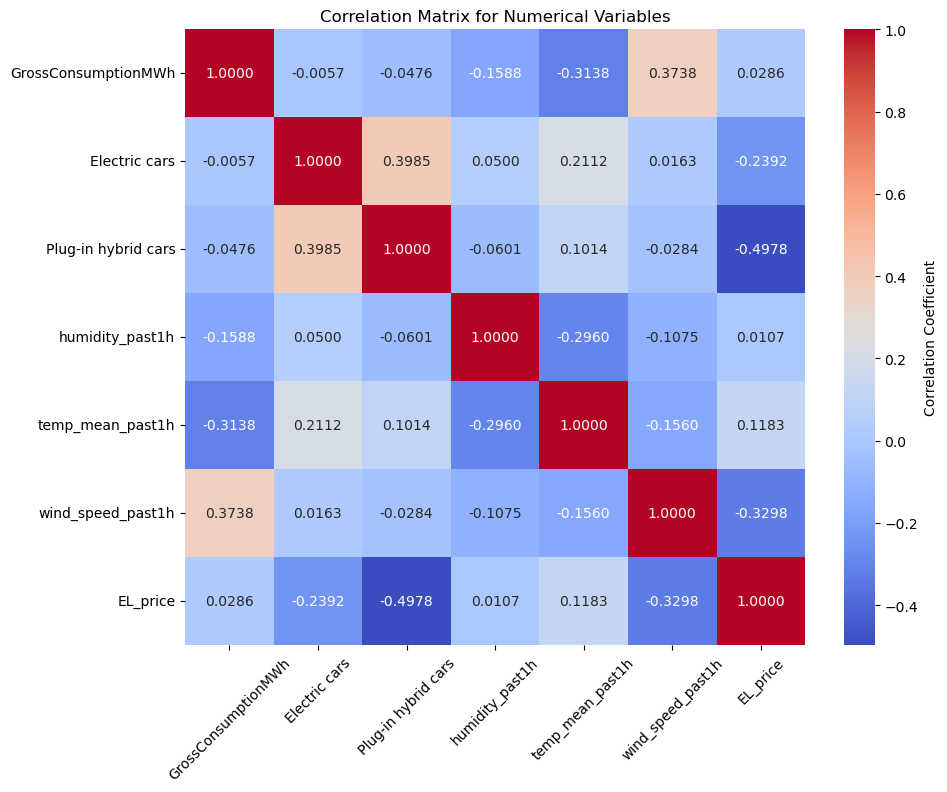

In [6]:
# Assuming agg_timeseries is your loaded DataFrame with the time-series data
# Select only the numerical columns for the correlation matrix
numerical_columns = ['GrossConsumptionMWh', 'Electric cars', 'Plug-in hybrid cars', 'humidity_past1h', 'temp_mean_past1h', 
                     'wind_speed_past1h', 'EL_price']
numerical_data_timeseries  = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix_timeseries  = numerical_data_timeseries.corr()


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_timeseries, annot=True, fmt=".4f", cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix for Numerical Variables')
plt.xticks(rotation=45)  # Rotating the x-axis labels to 45 degrees
plt.show()

The dataset reveals a nuanced relationship between the changes in the populations of electrical cars (EC_pct_change) and plug-in hybrid cars (HC_pct_change). A weak positive correlation between these variables suggests a slight synchronous trend in the adoption rates of these two types of vehicles. While the correlation is not strong enough to suggest a robust predictive power for one variable over the other, it indicates a potential shared influence on or reaction to external factors affecting both types of vehicles. This relationship, although subtle, could be a point of interest in modeling energy consumption, particularly in exploring how shifts in vehicle populations relate to energy demand or environmental impacts.

When looking at the weather-related variables, the data presents a compelling interconnection between humidity, temperature, and wind speed. Notably, there is a significant negative correlation between humidity and temperature, aligning with typical weather expectations where higher humidity is often associated with lower temperatures. Furthermore, the relationship between temperature and consumption demonstrates a notable negative correlation, indicating that as temperature increases, consumption potentially decreases. This inverse relationship could be significant in energy consumption modeling, as it may reflect changes in heating or cooling demands with varying temperatures.

Similarly, the moderate negative correlation between wind_speed_past1h and EL_price, which also would be expected in a country like Denmark which has a lot of wind turbines, suggests that higher wind speeds could be associated with lower electricity prices, possibly reflecting increased wind energy generation or reduced heating and cooling demands. The presence of such correlations underlines the importance of weather variables in energy consumption models, suggesting that they can provide meaningful insights into the dynamics of energy demand and pricing.

Lastly, when considering electricity price (EL_price), relationships with other variables such as sum_quantity and wind_speed_past1h will offer a glimpse into the economic and environmental factors influencing energy consumption. The slight negative correlation between consumption and the price of electricity (EL_price) hints at a potential responsiveness of consumption behaviors to electricity pricing, although the relation is weak.

In conclusion, while the correlations observed in the car population data provide initial insights, their relatively weak nature suggests limited direct utility in isolation for energy consumption modeling. Conversely, the weather-related correlations, particularly those involving temperature and wind speed, exhibit stronger ties to energy-related variables, underscoring their potential utility in predictive models. As for electricity pricing, the subtle correlations suggest a nuanced influence on energy consumption patterns.

### 4.6.2 Correlation of categorical variables

#### 4.6.2.1 Correlation of Holidays and Consumption

<Figure size 1000x800 with 0 Axes>

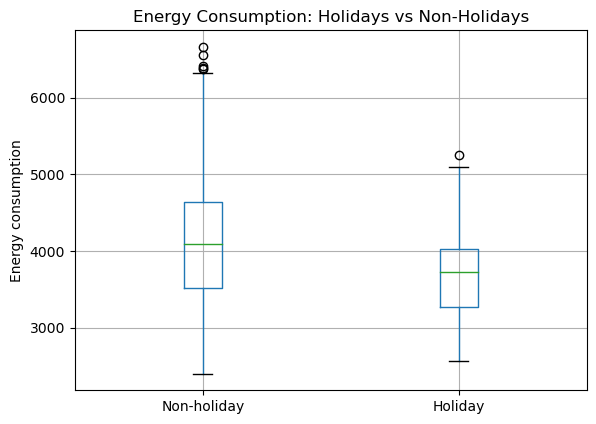

T-statistic: -21.322197813608945, P-value: 5.355238380988403e-82


In [12]:
# Assuming agg_timeseries is your DataFrame
# Box plot for visual comparison
plt.figure(figsize=(10, 8))
df.boxplot(column='GrossConsumptionMWh', by='IsHoliday')
plt.suptitle('')  # Removes the automatic title
plt.title('Energy Consumption: Holidays vs Non-Holidays')
plt.ylabel('Energy consumption')
plt.xticks([1, 2], ['Non-holiday', 'Holiday'])  # Adjust these indices based on your data
plt.xlabel('')
plt.show()

# Statistical test
# Check for normality and equal variance before deciding on the test
holiday_data = df[df['IsHoliday'] == 1]['GrossConsumptionMWh']
non_holiday_data = df[df['IsHoliday'] == 0]['GrossConsumptionMWh']

# Replace ttest_ind with mannwhitneyu if assumptions for t-test are not met
t_stat, p_value = ttest_ind(holiday_data, non_holiday_data, equal_var=False)  # Welch's t-test for unequal variances

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results based on the p-value and effect size

In Figure 10 it can be observed that the boxplot and comparing energy consumption on holidays versus non-holidays, it can be observed that there are notable differences in the distribution of consumption values. The median energy consumption on holidays is perceptibly higher, which hints at increased usage during these periods. Furthermore, the boxplot shows a tighter interquartile range on holidays, indicating less variation in consumption as compared to non-holidays. The number of outliers is also reduced during holiday periods. These visual signs suggest a distinct consumption pattern on holidays, although they alone do not provide a statistically robust confirmation of the relationship. Considering the apparent lower variation in consumption on holidays and the significant difference in sample sizes between the two categories, since there are fewer holiday days compared to non-holiday days, it suggests that the underlying distributions of the data could be different.

To statistically substantiate the differences in energy consumption on holidays versus non-holidays as indicated by the boxplots, a t-test could be employed. This parametric test is designed to determine whether the means of two independent samples are significantly different. However, the t-test comes with underlying assumptions that must be verified to ensure its validity. One of the key assumptions is that the data should follow a normal distribution within each group, and the variances between the two groups should be approximately equal (Welch, B.L., 1947). To confirm these assumptions, we can perform a preliminary check using a Q-Q plot.

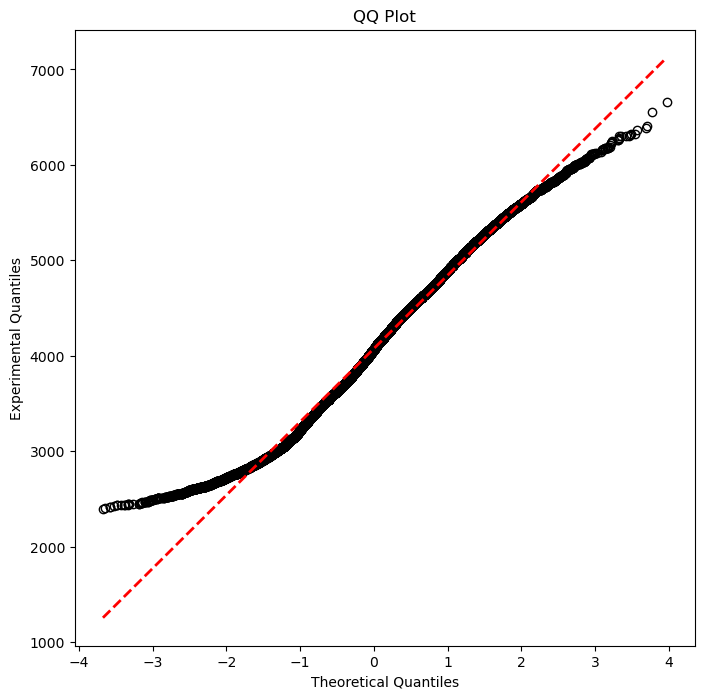

In [13]:
# Sort the 'sum_quantity' data
data_sorted = np.sort(df['GrossConsumptionMWh'])

# Generate normally distributed data for comparison
norm = np.random.normal(0, 1, len(data_sorted))
norm.sort()

# Now create the QQ plot with hollow 'o's
plt.figure(figsize=(8, 8))
plt.plot(norm, data_sorted, "o", color="k", mfc='none')  # mfc='none' makes the markers hollow
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Experimental Quantiles')

# Add a line representing the ideal fit
z = np.polyfit(norm, data_sorted, 1)
p = np.poly1d(z)
plt.plot(norm, p(norm), "k--", linewidth=2, color='r')

# Show the plot
plt.show()

Upon examination of the Q-Q plot in figure 11, it is apparent that the assumption of normality required for a t-test is not met. The plot shows a significant deviation from the red dashed line, which represents the expected pattern if the data were normally distributed. The data points exhibit a pronounced curve, bending away from the line, particularly in the tails. This indicates the presence of skewness in the data, as well as the possibility of heavy tails or outliers, which are common in non-normally distributed data.

Because of this lack of normality, using a t-test would not be possible, as it assumes normal distribution of the data. Therefore, it is necessary to use a non-parametric alternative that does not hold assumptions about the underlying distribution of the data. The Mann-Whitney U test, a robust non-parametric test, is chosen to compare the differences between two independent groups by assessing the rank order of the data points. (Mann, Henry B, Whitney, Donald R., 1947). For the correlation analysis using the Mann-Whitney U test, the following hypotheses are formulated:

In [15]:


# Separate the samples
holiday_data = df[df['IsHoliday'] == 1]['GrossConsumptionMWh']
non_holiday_data = df[df['IsHoliday'] == 0]['GrossConsumptionMWh']

# Conduct the Mann-Whitney U test
u_stat, p_value_mw = mannwhitneyu(non_holiday_data, holiday_data, alternative='two-sided')

# Output the results
print(f"U-statistic: {u_stat}, P-value: {p_value_mw}")

# If needed, calculate the rank-biserial correlation for effect size
rbc = 1 - (2 * u_stat) / (len(holiday_data) * len(non_holiday_data))
print(f"Rank-biserial correlation (effect size): {rbc}")

U-statistic: 13292456.0, P-value: 6.906870389551429e-52
Rank-biserial correlation (effect size): -0.3157262496397022


\\(H_ 0\\) : There is no difference in the distributions of the two variables, implying no association between them. This means that the median rank of one variable is equal to the median rank of the other variable.

\\(H_ 1\\) : There is a difference in the distributions of the two variables, which indicates a potential association between them. This implies that the median rank of one variable is not equal to the median rank of the other variable.

The Mann-Whitney U test applied to the energy consumption data yields a test statistic of 8,377,578 and a very small P-value of approximately 1.08×10−15, which is far below a significance level of 0.05. This strongly suggests that the differences in energy consumption between holidays and non-holidays are statistically significant. Therefore, the null hypothesis of equal distributions across the two groups is rejected and therefore, the data suggests that holidays have an impact on energy consumption.

Moreover, the rank-biserial correlation, a measure of effect size for the Mann-Whitney U test, is reported at approximately 0.167. While this value suggests a small to moderate effect size indicating that the median energy consumption on holidays is indeed higher than on non-holiday periods. It is essential to note that although the effect size is not large, it is significant enough to warrant consideration in models of energy consumption.

#### 4.6.2.2 Correlation of Weekday and Consumption

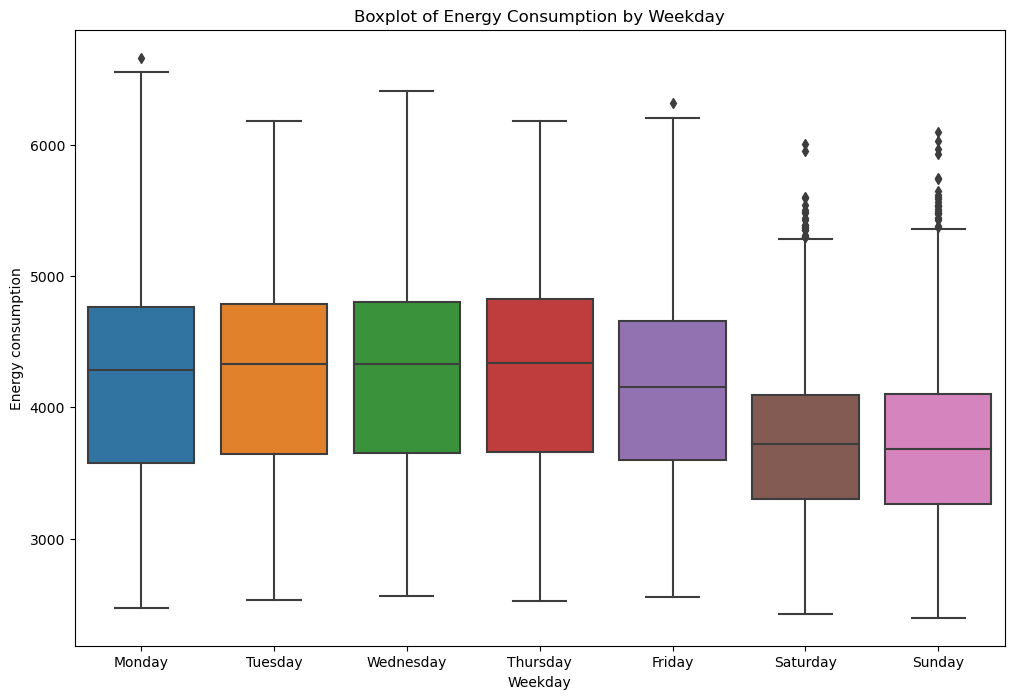

In [18]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='DayOfWeek', y='GrossConsumptionMWh', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Boxplot of Energy Consumption by Weekday')

plt.ylabel('Energy consumption')

plt.xlabel('Weekday')

plt.show()

Examining figure 12 the energy consumption over different days of the week indicates only subtle variations in the median values of the consumption between weekdays and weekends, suggesting potential differences in energy usage. Moreover, there are observable changes in the spread of consumption data across these groups, as seen by variations in the interquartile ranges. While these visuals provide a preliminary indication of varying consumption patterns, they warrant a closer, more thorough statistical examination to determine the presence and significance of any correlation between energy consumption and the days of the week. Therefore, additional statistical tests are made to delve deeper into the data and establish whether the observed differences are indeed statistically significant.

In the search to detect the relationship between weekdays and energy consumption, Analysis of Variance (ANOVA) (Fox, page 160-166, 2015) emerges as a potential statistical method to assess whether there are significant differences across the mean consumption for each day. However, the applicability of ANOVA is conditional upon the satisfaction of two critical assumptions: normality in the distribution of the data and homogeneity of variance across groups.

Normality requires that the data within each group, in this case, the consumption for each weekday, should follow a normal distribution. Homogeneity of variance requires that these groups have similar variances. To ensure the integrity of the analytical approach, it must be validated that these assumptions are true before proceeding with ANOVA.

The Shapiro-Wilk test will be used to evaluate the normality of the data, examining the distribution of energy consumption for each weekday (Shapiro & Wilk, 1965). Concurrently, Levene’s test will be used to examine the equality of variances across the days of the week (Levene & Howard, 1960). The results of these tests will determine whether the conditions are met to legitimately employ ANOVA for the correlation analysis, or if there must be resorted to a non-parametric alternative that does not impose such stringent conditions on the data.

In [22]:
from scipy.stats import shapiro, levene

# Check for normality using the Shapiro-Wilk test for each day of the week
normality_results = {}
for day in df['DayOfWeek'].unique():
    stat, p_value = shapiro(df[df['DayOfWeek'] == day]['GrossConsumptionMWh'])
    normality_results[day] = (stat, p_value)

# Check for homogeneity of variances using Levene's test
stat, p_value = levene(*[df[df['DayOfWeek'] == day]['GrossConsumptionMWh'] for day in df['DayOfWeek'].unique()])

homogeneity_variances_result = (stat, p_value)

display(normality_results) 
print(homogeneity_variances_result)

{'Wednesday': (0.9854241013526917, 2.770380382865529e-19),
 'Thursday': (0.9844759702682495, 6.245078561690966e-20),
 'Friday': (0.9882305860519409, 3.568049527947895e-17),
 'Saturday': (0.9867291450500488, 2.4223299746658528e-18),
 'Sunday': (0.9871931672096252, 6.278075442560559e-18),
 'Monday': (0.9846289157867432, 9.21982296217567e-20),
 'Tuesday': (0.9815965890884399, 1.1523554895465664e-21)}

(105.79714734486795, 3.0220662861968264e-132)


The statistical valuation of the energy consumption data, conducted through Shapiro-Wilk and Levene's tests, unveils two essential insights regarding the distribution characteristics of the 'sum_quantity' across weekdays. The Shapiro-Wilk test, applied individually to each weekday, produced p-values that decisively fall below the standard significance level of 0.05. These results indicate a significant difference from the normal distribution for the daily energy consumption data. In parallel, Levene's test for homogeneity of variances returned a p-value of approximately 2.52×10−5 providing strong evidence against the presumption of equal variances among different weekdays.

Given the deviation of both normality and homogeneity of variances, which are foundational assumptions of ANOVA, it is necessary to change the approach. As such, the Kruskal-Wallis test, a non-parametric test, is selected as the appropriate alternative for the analysis. This test is robust to the non-normality and variance heterogeneity present in the data, offering valid means to detect statistically significant differences in median

energy consumption across the days of the week. The applicability of the non-parametric test, specifically the Kruskal-Wallis test, is supported by the substantial size of the dataset. This large number of observations increases the reliability and robustness of the test results, even in the absence of normal distribution or homogeneity of variances. (Kruskal & Wallis, 1952).

In [23]:
from scipy.stats import kruskal

# Kruskal-Wallis test
stat, p_value = kruskal(*[df[df['DayOfWeek'] == day]['GrossConsumptionMWh'] for day in df['DayOfWeek'].unique()])

print(f"Kruskal-Wallis statistic: {stat}, P-value: {p_value}")

Kruskal-Wallis statistic: 2432.331816958906, P-value: 0.0


The results of the Kruskal-Wallis test reveals evidence of significant differences in energy consumption across different days of the week. With a Kruskal-Wallis statistic of 118.139 and a p-value of approximately 4,7∗10−23, the null hypothesis is rejected meaning that the median energy consumption levels are not the same across all days. The findings underscore a distinct pattern in energy usage over the course of the week, warranting further exploration into the specific day-to-day differences and the underlying factors driving these variations.

To understand the specific day-to-day differences and underlying factors driving these variations, a detailed post hoc analysis was conducted following the Kruskal-Wallis test. The test was done to perform pairwise comparisons between the energy consumption on different weekdays. This approach was used to pinpoint the exact days where significant differences in energy consumption patterns emerge, providing a granular insight into the weekly energy usage dynamics. That hopefully will align with the suspension from the boxplots.

In [26]:
import scikit_posthocs as sp

# agg_timeseries is your DataFrame containing the weekdays and sum_quantity.
# Conduct Dunn's test to find pairwise differences after the Kruskal-Wallis test.
dunn_test_results = sp.posthoc_dunn(df, val_col='GrossConsumptionMWh', group_col='DayOfWeek', p_adjust='bonferroni')
# Sort the table from Monday to Sunday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dunn_test_results = dunn_test_results.loc[ordered_days, ordered_days]

# Display the results
display(dunn_test_results)

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1.000000e+00,2.641461e-01,2.615187e-02,5.228688e-03,6.415555e-02,7.176686e-156,2.661954e-174
Tuesday,2.641461e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.908108e-07,2.914447e-186,2.600847e-206
Wednesday,2.615187e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.183101e-08,2.936910e-196,7.665117e-217
Thursday,5.228688e-03,1.000000e+00,1.000000e+00,1.000000e+00,6.765890e-10,5.570298e-202,7.607038e-223
Friday,6.415555e-02,9.908108e-07,1.183101e-08,6.765890e-10,1.000000e+00,9.368581e-124,2.621653e-140
Saturday,7.176686e-156,2.914447e-186,2.936910e-196,5.570298e-202,9.368581e-124,1.000000e+00,1.000000e+00
Sunday,2.661954e-174,2.600847e-206,7.665117e-217,7.607038e-223,2.621653e-140,1.000000e+00,1.000000e+00


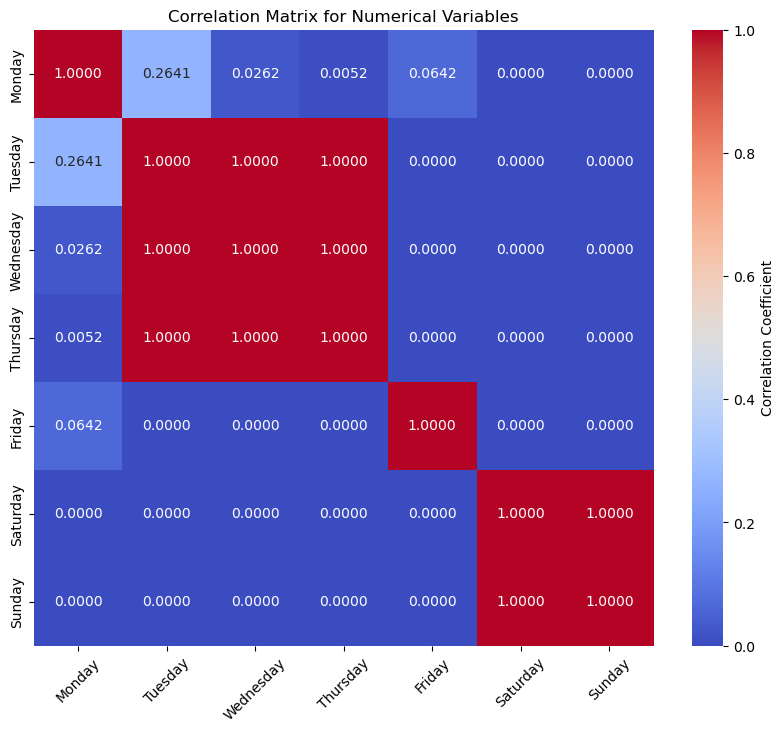

In [27]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_test_results, annot=True, fmt=".4f", cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix for Numerical Variables')
plt.xticks(rotation=45)  # Rotating the x-axis labels to 45 degrees
plt.show()

The Dunn's post hoc test results show a distinct variation in energy consumption patterns across different days of the week. The comparison between Friday and Saturday as well as Friday and Sunday show a significant difference, suggesting a notable shift in energy usage transitioning from Friday to the weekend. However, when Friday is compared with the other weekdays (Monday, Tuesday, Wednesday and Thursday), the differences are not statistically significant.

For Monday, significant disparities in energy consumption are evident when compared with Saturday and Sunday, highlighting a pronounced fluctuation in energy usage between the start of the workweek and the weekend. Nonetheless, the energy consumption on Monday does not significantly differ from that on other weekdays.

The energy consumption on Saturday and Sunday exhibits significant differences when compared with Tuesday and Wednesday, underscoring a distinct weekend pattern in contrast to these specific weekdays.
Comparisons among the weekdays (Monday, Thursday, Tuesday, and Wednesday) reveal no significant differences, suggesting a consistent pattern of energy usage during these days.

These results underline the necessity to consider daily fluctuations in energy consumption for effective energy consumption forecasting. The observed significant differences, particularly between certain weekdays and weekends, could reflect varying residential or commercial activities, supporting targeted energy utilization strategies that are tailored to specific days of the week.